# Resume Parsing

## 1. Load data

In [1]:
import pandas as pd
import numpy as np

df_resume = pd.read_csv("./app/data/Resume.csv")
df_resume.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [2]:
df_resume.Category.unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [3]:
df_resume.shape

(2484, 4)

In [4]:
df_resume = df_resume.reindex(np.random.permutation(df_resume.index))
df_resume

,ID,Resume_str,Resume_html,Category
1423,14569498,CHEF OWNER Executive Profile ...,"<div class=""fontsize fontface vmargins hmargin...",CHEF
27,29297973,HR REPRESENTATIVE Summary Ex...,"<div class=""fontsize fontface vmargins hmargin...",HR
1709,25608963,ENGINEERING TECHNICIAN Summ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
2169,12021752,SENIOR INVESTMENT BANKING SALES ANALY...,"<div class=""fontsize fontface vmargins hmargin...",BANKING
1198,18227306,CONSULTANT Experience ...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT
...,...,...,...,...
2217,25624652,SENIOR STUDENT ACCOUNTS OFFICER ...,"<div class=""fontsize fontface vmargins hmargin...",BANKING
846,31042953,MANAGER Professional Summary ...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS
793,24444525,FITNESS SPECIALIST Summary ...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS
582,20357858,"FOUNDER, BUSINESS DEVELOPMENT DIRECTO...","<div class=""fontsize fontface vmargins hmargin...",BUSINESS-DEVELOPMENT


In [5]:
df_resume = df_resume.copy().iloc[:1000, ]
df_resume

,ID,Resume_str,Resume_html,Category
1423,14569498,CHEF OWNER Executive Profile ...,"<div class=""fontsize fontface vmargins hmargin...",CHEF
27,29297973,HR REPRESENTATIVE Summary Ex...,"<div class=""fontsize fontface vmargins hmargin...",HR
1709,25608963,ENGINEERING TECHNICIAN Summ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
2169,12021752,SENIOR INVESTMENT BANKING SALES ANALY...,"<div class=""fontsize fontface vmargins hmargin...",BANKING
1198,18227306,CONSULTANT Experience ...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT
...,...,...,...,...
1026,15273850,SENIOR SALES ASSISTANT/ SALES SUPPORT...,"<div class=""fontsize fontface vmargins hmargin...",SALES
895,16605352,RECEPTIONIST AND VETERINARY TECHNICIA...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS
1439,91072502,PREMIUM CLUB CHEF Executive Pro...,"<div class=""fontsize fontface vmargins hmargin...",CHEF
1903,13701259,SENIOR ACCOUNTANT Summary Se...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT


In [6]:
df_resume.shape

(1000, 4)

## 2. Load skill data

If we define patterns for all the skill, we gonna be too tired.

So spacy knows that, so it allows you to give you a list of words, then it will automatically create pattern.

In [7]:
import spacy

nlp        = spacy.load('en_core_web_md')
ruler = nlp.add_pipe("entity_ruler")


/home/koala/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
skill_path = './app/data/jz_skill_patterns.jsonl'
ruler.from_disk(skill_path) 
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [9]:
doc = nlp("Chaky loves ajax.")
doc.ents

(Chaky, ajax)

In [10]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Chaky NORP
ajax SKILL


## 3. Let's try to extract skills from this resume.csv

In [11]:
df_resume.head()

,ID,Resume_str,Resume_html,Category
1423,14569498,CHEF OWNER Executive Profile ...,"<div class=""fontsize fontface vmargins hmargin...",CHEF
27,29297973,HR REPRESENTATIVE Summary Ex...,"<div class=""fontsize fontface vmargins hmargin...",HR
1709,25608963,ENGINEERING TECHNICIAN Summ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING
2169,12021752,SENIOR INVESTMENT BANKING SALES ANALY...,"<div class=""fontsize fontface vmargins hmargin...",BANKING
1198,18227306,CONSULTANT Experience ...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT


In [12]:
#clean our data

from spacy.lang.en.stop_words import STOP_WORDS

def preprocessing(sentence):

    stopwords    = list(STOP_WORDS)
    doc          = nlp(sentence)
    clean_tokens = []
    
    for token in doc:
        if token.text not in stopwords and token.pos_ != 'PUNCT' and token.pos_ != 'SYM' and \
            token.pos_ != 'SPACE':
                clean_tokens.append(token.lemma_.lower().strip())
                
    return " ".join(clean_tokens)

In [13]:
random_resume = df_resume.Resume_str.iloc[5]
random_resume[:300]

'         JOB CAPTAIN\nDESIGNER         Highlights        Software Literacy:\n-  AutoCAD R14 & 2000, Aperture v. 5.0, Microstation 7.1, \n-  Adobe Illustrator, Photoshop 6.0, Excel, Word              Experience     12/2002   to   Current     Job Captain\nDesigner    Company Name   －   City  ,   State    '

In [14]:
preprocessing(random_resume[:300])

'job captain designer highlights software literacy autocad r14 & 2000 aperture v. 5.0 microstation 7.1 adobe illustrator photoshop 6.0 excel word experience 12/2002 current job captain designer company name － city state'

In [15]:
for i, row in df_resume.iterrows():
    clean_text = preprocessing(row.Resume_str)
    df_resume.at[i, 'Clean_resume'] = clean_text

In [16]:
df_resume.head()

,ID,Resume_str,Resume_html,Category,Clean_resume
1423,14569498,CHEF OWNER Executive Profile ...,"<div class=""fontsize fontface vmargins hmargin...",CHEF,chef owner executive profile a combination spe...
27,29297973,HR REPRESENTATIVE Summary Ex...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr representative summary experience human res...
1709,25608963,ENGINEERING TECHNICIAN Summ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,engineer technician summary a challenging posi...
2169,12021752,SENIOR INVESTMENT BANKING SALES ANALY...,"<div class=""fontsize fontface vmargins hmargin...",BANKING,senior investment banking sales analyst summar...
1198,18227306,CONSULTANT Experience ...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT,consultant experience consultant january 2012 ...


## 4. Let's really extract skills!!

In [17]:
import re
def get_skills(text):
    
    doc = nlp(text)
    
    skills = []
    
    for ent in doc.ents:
        if re.match(r'^SKILL', ent.label_):
            skills.append(ent.text)
            
    return skills

def unique_skills(x):
    return list(set(x))

In [18]:
df_resume = df_resume[:100]

In [19]:
df_resume['Skills'] = df_resume.Clean_resume.apply(get_skills)
df_resume['Skills'] = df_resume.Skills.apply(unique_skills)

/tmp/ipykernel_195169/138658587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resume['Skills'] = df_resume.Clean_resume.apply(get_skills)
/tmp/ipykernel_195169/138658587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resume['Skills'] = df_resume.Skills.apply(unique_skills)


In [20]:
df_resume.Skills.iloc[0]

['fusion', 'marketing', 'business', 'chef', 'schedule']

In [21]:
df_resume.Skills.iloc[2]

['specification',
 'software',
 'testing',
 'component',
 'engineering',
 'robot',
 'pose',
 'system testing',
 'manufacturing engineering',
 'workflow',
 'signal processing',
 'support',
 'algorithm',
 'design',
 'system integration',
 'documentation',
 'schedule']

In [22]:
df_resume

,ID,Resume_str,Resume_html,Category,Clean_resume,Skills
1423,14569498,CHEF OWNER Executive Profile ...,"<div class=""fontsize fontface vmargins hmargin...",CHEF,chef owner executive profile a combination spe...,"[fusion, marketing, business, chef, schedule]"
27,29297973,HR REPRESENTATIVE Summary Ex...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr representative summary experience human res...,"[design, schedule]"
1709,25608963,ENGINEERING TECHNICIAN Summ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,engineer technician summary a challenging posi...,"[specification, software, testing, component, ..."
2169,12021752,SENIOR INVESTMENT BANKING SALES ANALY...,"<div class=""fontsize fontface vmargins hmargin...",BANKING,senior investment banking sales analyst summar...,"[finance, marketing, business, support]"
1198,18227306,CONSULTANT Experience ...,"<div class=""fontsize fontface vmargins hmargin...",CONSULTANT,consultant experience consultant january 2012 ...,"[software, engineering, finance, marketing, bu..."
...,...,...,...,...,...,...
1108,29815762,SALES ASSOCITE Professional Sum...,"<div class=""fontsize fontface vmargins hmargin...",SALES,sales associte professional summary dedicate m...,"[interaction, software, box]"
1033,30529547,SALES REPRESENTATIVE Summary ...,"<div class=""fontsize fontface vmargins hmargin...",SALES,sale representative summary bi - lingual effic...,[relay]
1268,18525641,"DIRECTOR, MEDIA STRATEGY Summar...","<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA,director media strategy summary season medium ...,"[communications, software, advertising, medium..."
430,86322251,READING TEACHER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER,read teacher summary i highly motivated educat...,[material]


## 5. Visualization

Which skills is most important in information management?

In [23]:
set(df_resume.Category)

{'ACCOUNTANT',
 'ADVOCATE',
 'AGRICULTURE',
 'APPAREL',
 'ARTS',
 'AVIATION',
 'BANKING',
 'BPO',
 'BUSINESS-DEVELOPMENT',
 'CHEF',
 'CONSTRUCTION',
 'CONSULTANT',
 'DESIGNER',
 'DIGITAL-MEDIA',
 'ENGINEERING',
 'FINANCE',
 'FITNESS',
 'HEALTHCARE',
 'HR',
 'INFORMATION-TECHNOLOGY',
 'PUBLIC-RELATIONS',
 'SALES',
 'TEACHER'}

In [24]:
category = 'INFORMATION-TECHNOLOGY'
cond     = df_resume.Category == category

df_resume_it = df_resume[cond]
df_resume_it.shape

(3, 6)

In [25]:
all_skills = np.concatenate(df_resume_it.Skills.values)

In [26]:
all_skills

array(['testing', 'azure', 'help desk', 'virtual machine', 'database',
       'support', 'security', 'visual basic', 'azure storage', 'ios',
       'wireless', 'windows', 'linux', 'java', 'business',
       'systems management', 'framework', 'diagram', 'specification',
       'scanner', 'vault', 'wireless network', 'deployment',
       'visual studio', 'mobile', 'router', 'release', 'network security',
       'design', 'debugging', 'operating system', 'software', 'server',
       'bash', 'system testing', 'ubuntu', 'languages', 'certificate',
       'distributed file system', 'vmware vsphere', 'documentation',
       'content management', 'engineering', 'project management',
       'database', 'algorithm', 'support', 'security', 'ios', 'java',
       'windows', 'linux', 'wireless', 'business', 'certificate',
       'computer science', 'diagram', 'component', 'operating systems',
       'telephony', 'medium', 'marketing', 'mobile', 'cloud storage',
       'design', 'software', 'android'

In [27]:
from collections import Counter, OrderedDict

counting = Counter(all_skills)
counting

Counter({'database': 3,
         'support': 3,
         'security': 3,
         'windows': 3,
         'linux': 3,
         'business': 3,
         'design': 3,
         'software': 3,
         'documentation': 3,
         'ios': 2,
         'wireless': 2,
         'java': 2,
         'diagram': 2,
         'mobile': 2,
         'server': 2,
         'ubuntu': 2,
         'languages': 2,
         'certificate': 2,
         'project management': 2,
         'operating systems': 2,
         'testing': 1,
         'azure': 1,
         'help desk': 1,
         'virtual machine': 1,
         'visual basic': 1,
         'azure storage': 1,
         'systems management': 1,
         'framework': 1,
         'specification': 1,
         'scanner': 1,
         'vault': 1,
         'wireless network': 1,
         'deployment': 1,
         'visual studio': 1,
         'router': 1,
         'release': 1,
         'network security': 1,
         'debugging': 1,
         'operating system': 1,
     

In [28]:
counting = OrderedDict(counting.most_common(10))

In [29]:
counting

OrderedDict([('database', 3),
             ('support', 3),
             ('security', 3),
             ('windows', 3),
             ('linux', 3),
             ('business', 3),
             ('design', 3),
             ('software', 3),
             ('documentation', 3),
             ('ios', 2)])

<BarContainer object of 10 artists>

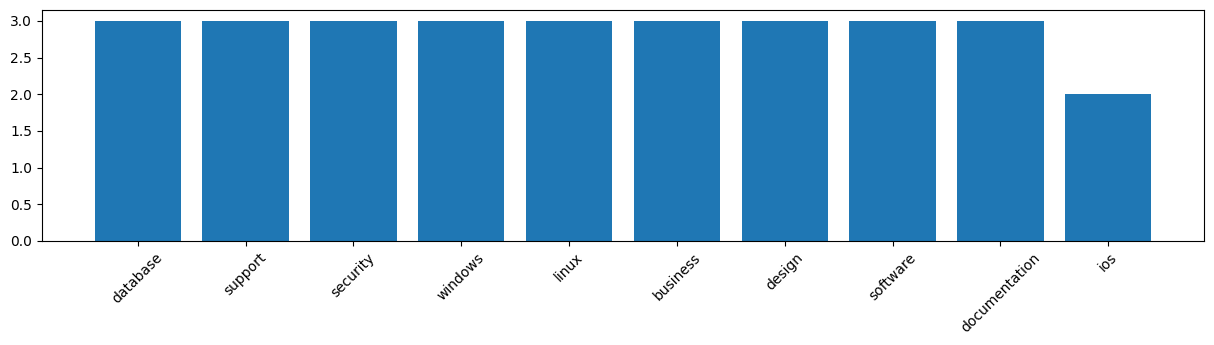

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 3))
plt.xticks(rotation=45)

plt.bar(counting.keys(), counting.values())

## 6. Name Entity Recognition

In [31]:
from spacy import displacy

text = df_resume_it.Clean_resume.iloc[1]
text

'it management career overview detail orient professional extensive information technology experience hardware software troubleshooting management with additional experience networking task automation server technology digital graphic design client + server programming technology popular industry software package include microsoft office adobe creative suite qualification education certificate troubleshooting q comptia a+ certify 2012 q advanced troubleshooting q comptia net+ certification class q virus spyware removal q mcsa certification class q computer diagnostic repair q web development i + ii class q gaming console repair q digital media manipulation class modification q java programming class q mobile device repair q hardware support programming web troubleshoot q html html5 q optimizing performance tune q xml q audio video technology q css css3 q medical technology installation q javascript troubleshoot q command line q java management q actionscript q hardware software upgrade

In [32]:
doc = nlp(text)
doc

it management career overview detail orient professional extensive information technology experience hardware software troubleshooting management with additional experience networking task automation server technology digital graphic design client + server programming technology popular industry software package include microsoft office adobe creative suite qualification education certificate troubleshooting q comptia a+ certify 2012 q advanced troubleshooting q comptia net+ certification class q virus spyware removal q mcsa certification class q computer diagnostic repair q web development i + ii class q gaming console repair q digital media manipulation class modification q java programming class q mobile device repair q hardware support programming web troubleshoot q html html5 q optimizing performance tune q xml q audio video technology q css css3 q medical technology installation q javascript troubleshoot q command line q java management q actionscript q hardware software upgrade 

In [33]:
for ent in doc.ents:
    if re.match(r'^SKILL',ent.label_):
        ent.label_ = 'SKILL'
    print(ent.text, ent.label_)

software SKILL
server SKILL
graphic design SKILL
server SKILL
software SKILL
microsoft ORG
certificate SKILL
2012 DATE
java SKILL
mobile SKILL
support SKILL
javascript SKILL
java SKILL
software SKILL
database SKILL
server SKILL
documentation SKILL
android ORG
mobile SKILL
content management SKILL
operating systems SKILL
windows SKILL
95 CARDINAL
windows SKILL
server SKILL
2003 DATE
search engine SKILL
windows SKILL
7.0 8.0 CARDINAL
marketing SKILL
linux SKILL
ubuntu SKILL
10.04 CARDINAL
12.10 CARDINAL
android SKILL
1.0 4.0.4 q PRODUCT
v10.0 DATE
server SKILL
ios SKILL
1.0 6.1 CARDINAL
microsoft ORG
2010 DATE
business SKILL
security SKILL
software SKILL
server SKILL
wireless SKILL
5 CARDINAL
telephony SKILL
engineering SKILL
component SKILL
diagram SKILL
business SKILL
algorithm SKILL
quantum particle mechanic q ORG
monthly DATE
40884 MONEY
design SKILL
server SKILL
software SKILL
component SKILL
daily DATE
server SKILL
software SKILL
project management SKILL
cloud storage SKILL
securit

In [34]:
colors = {"SKILL": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style='ent', options=options)

### Add email pattern

In [35]:
email_pattern = [{'label': 'EMAIL', 
                  'pattern': [{'TEXT': {'REGEX': '[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'}}]}]
ruler.add_patterns(email_pattern)

### Add education pattern

In [36]:
education_pattern = [
    {"label": "EDUCATION", "pattern": [{"LOWER": {"IN": ["bsc", "bachelor", "bachelor's", "b.a", "b.s"]}}, {"IS_ALPHA": True, "OP": "*"}]},
    {"label": "EDUCATION", "pattern": [{"LOWER": {"IN": ["msc", "master", "master's", "m.a", "m.s"]}}, {"IS_ALPHA": True, "OP": "*"}]},
    {"label": "EDUCATION", "pattern": [{"LOWER": {"IN": ["phd", "ph.d", "doctor", "doctorate"]}}, {"IS_ALPHA": True, "OP": "*"}]}]
ruler.add_patterns(education_pattern)

### Add website_pattern

In [37]:
web_patterns = [
    {"label": "WEBSITE", "pattern": [{"TEXT": {"REGEX": "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"}}]}]
ruler.add_patterns(web_patterns)


In [56]:
mobile_pattern = [
    {   "label": "MOBILE",
        "pattern": [
            {"TEXT": {"REGEX": r"\+?\d{1,3}"}},  
            {"ORTH": "-", "OP": "?"},           
            {"TEXT": {"REGEX": r"\d{2,3}"}},     
            {"ORTH": "-", "OP": "?"},           
            {"TEXT": {"REGEX": r"\d{3,4}"}},     
            {"ORTH": "-", "OP": "?"},            
            {"TEXT": {"REGEX": r"\d{4}"}}]},
        {"label": "PHONE NUMBER",  "pattern": [{"TEXT": {"REGEX": "((\d){7,12})"}}]}
        ]

ruler.add_patterns(mobile_pattern)


text = 'my phone number is +66-63-310-9191'
text2 = 'my phone number is 6666555'

doc  = nlp(text)
doc2 = nlp(text2)

for ent in doc.ents:
    print(ent.text, ent.label_)

for ent in doc2.ents:
    print(ent.text, ent.label_)

+66-63-310-9191 MOBILE
6666555 CARDINAL


In [39]:
text = "+66-63-310-919"
doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label_)

### Add mobile_pattern

In [40]:
# import re

# pattern = r"\+?(\d{2,3})-(\d{2,3})-(\d{3})-(\d{3})"
# text = "+66-63-310-919"

# match = re.search(pattern, text)
# if match:
#     print("Match found:", match.group())
# else:
#     print("No match found.")


In [41]:
print(ruler.patterns)

[{'label': 'SKILL', 'pattern': [{'TEXT': 'HuggingFace'}]}, {'label': 'SKILL', 'pattern': [{'TEXT': 'PowerBI'}]}, {'label': 'SKILL', 'pattern': [{'TEXT': '.NET'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': ''}, {'LOWER': 'net'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': '1password'}]}, {'label': 'SKILL', 'pattern': [{'TEXT': '3D'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': '3d'}, {'LOWER': 'reconstruction'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'aboutness'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'data'}, {'LOWER': 'type'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'interpretation'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'machine'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'control'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'method'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'network'}]}, {'label': 'SKILL', 'pattern': [{'LOWER': 'ac

## 7. Let's load the PDF - add some realism

In [48]:
from PyPDF2 import PdfReader

reader = PdfReader("/home/koala/github/NLP/NLP-A4/resume/chaklam_resume.pdf")
page   = reader.pages[0]
text   = page.extract_text()

In [49]:
text

'Chaklam Silpasuwanchai Email : chaklam@ait.asia\nhttp://chaklam.com Mobile : +66-63-310-9191\nhttp://github.com/chaklam-silpasuwanchai\nSkills\n•Language : Python, Java, Javascript\n•Tools/Frameworks : AWS/Azure, PyTorch, HuggingFace, Langchain, SpringBoot, PowerBI\n•Theory : Natural Language Processing, Machine/Deep Learning, Software Engineering / Architecture,\nHuman-Computer Interaction, Brain-Computer Interfaces\nSelected Projects\n•Large Language Models : Develop conversational AI for legal question answering, writing assistant, AI-generated\ndetector, university chatbots, summarization, etc. using large language models.\n•BCI Speller : Develop a real-time speller using EEG for locked-in patients.\n•Non-Invasive Blood Glucose Measuring Using Raman Spectroscopy : Utilize Raman Spectroscopy to\nnon-invasively measure blood glucose.\n•Medical Imaging : Utilize deep learning and language models for medical image analysis and explanations.\nWorking Experience\n•Asian Institute of Tec

In [50]:
text = preprocessing(text)

In [51]:
text

'chaklam silpasuwanchai email chaklam@ait.asia http://chaklam.com mobile +66 - 63 310 - 9191 http://github.com/chaklam-silpasuwanchai skill •language python java javascript •tool frameworks aws azure pytorch huggingface langchain springboot powerbi •theory natural language processing machine deep learning software engineering architecture human computer interaction brain computer interface selected projects •large language model develop conversational ai legal question answer write assistant ai generate detector university chatbot summarization etc . large language model •bci speller develop real time speller eeg lock patient •non invasive blood glucose measuring use raman spectroscopy utilize raman spectroscopy non - invasively measure blood glucose •medical imaging utilize deep learning language model medical image analysis explanation working experience •asian institute technology pathumthani thailand assistant professor school engineering technology january 2019 present •stamford i

In [52]:
doc = nlp(text)

In [53]:
colors["SKILL"]     = "linear-gradient(90deg, #aa9cfc, #fc9ce7)"
colors["EDUCATION"] = "linear-gradient(90deg, #ffd700, #ff6347)" 
colors["EMAIL"]     = "linear-gradient(90deg, #98fb98, #008000)" 
colors["WEBSITE"]   = "linear-gradient(90deg, #ffff00, #ffdd00)"
colors['MOBILE']    = "linear-gradient(90deg, #ffff00, #FF0000)"

options = {"colors": colors}

displacy.render(doc, style='ent', options=options)